In [1]:
import sys
sys.path.append("../")

from sklearn.datasets import make_regression
import torch

# Générer un jeu de données 500 exemples, 5 featuraes
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)

# Convertir en tenseurs PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)






In [2]:
from core.MLp_layer import *
from core.model_structure import *

In [3]:
MLp_model=Deep_learning_Model(
    "adam","Mse"
)
MLp_model.add_layers([
Layer(X.shape[1],128,"HeNormal","relu"),
Layer(128,64,"HeNormal","relu"),
Layer(64,5,"HeNormal","relu"),
Layer(5,1,"HeNormal"),]

)

In [4]:
from utils.data_manipulation import split_data
x_train,y_train,x_test,y_test=split_data(X,y,0.7)
print(f" xtrain_shape :{x_train.shape} , x_test_shape:{x_test.shape} ytrain_shape:{y_train.shape} ytest_shape:{y_test.shape}")



 xtrain_shape :torch.Size([350, 5]) , x_test_shape:torch.Size([150, 5]) ytrain_shape:torch.Size([350, 1]) ytest_shape:torch.Size([150, 1])


In [5]:
train_losses,val_losses=MLp_model.minibatch_SGD_train(100,x_train,y_train,x_test,y_test,batch_size=32,learning_rate=0.01)


1 | Train Loss: 7356.2625 | Val Loss: 5110.4717
2 | Train Loss: 7127.9582 | Val Loss: 5041.0415
3 | Train Loss: 7133.0797 | Val Loss: 4947.1382
4 | Train Loss: 7245.4245 | Val Loss: 4824.4590
5 | Train Loss: 6829.9128 | Val Loss: 4676.7827
6 | Train Loss: 6914.6212 | Val Loss: 4510.2163
7 | Train Loss: 6293.7626 | Val Loss: 4321.7720
8 | Train Loss: 6087.2735 | Val Loss: 4108.4644
9 | Train Loss: 5755.4365 | Val Loss: 3869.8904
10 | Train Loss: 5462.0136 | Val Loss: 3607.6116
11 | Train Loss: 4935.9404 | Val Loss: 3326.1257
12 | Train Loss: 4706.5941 | Val Loss: 3032.0046
13 | Train Loss: 4166.8342 | Val Loss: 2733.9155
14 | Train Loss: 3830.2653 | Val Loss: 2443.1826
15 | Train Loss: 3336.7121 | Val Loss: 2168.7556
16 | Train Loss: 2872.0311 | Val Loss: 1918.8727
17 | Train Loss: 2397.3046 | Val Loss: 1692.1364
18 | Train Loss: 2174.9455 | Val Loss: 1475.2418
19 | Train Loss: 1857.7233 | Val Loss: 1258.5735
20 | Train Loss: 1580.5283 | Val Loss: 1045.7856
21 | Train Loss: 1355.5284 | 

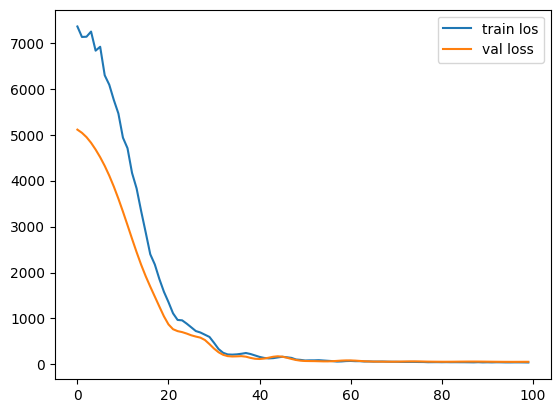

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(100),train_losses,label="train los")
plt.plot(range(100),val_losses,label="val loss")
plt.legend()